# **Employee Retention Prediction**

# Importing Libraries

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the Data

In [99]:
df = pd.read_csv("/content/HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Understanding the Data

In [100]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [101]:
df.shape

(14999, 10)

In [102]:
df.size

149990

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [104]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [105]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [106]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

In [107]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# Exploratory Data Analysis

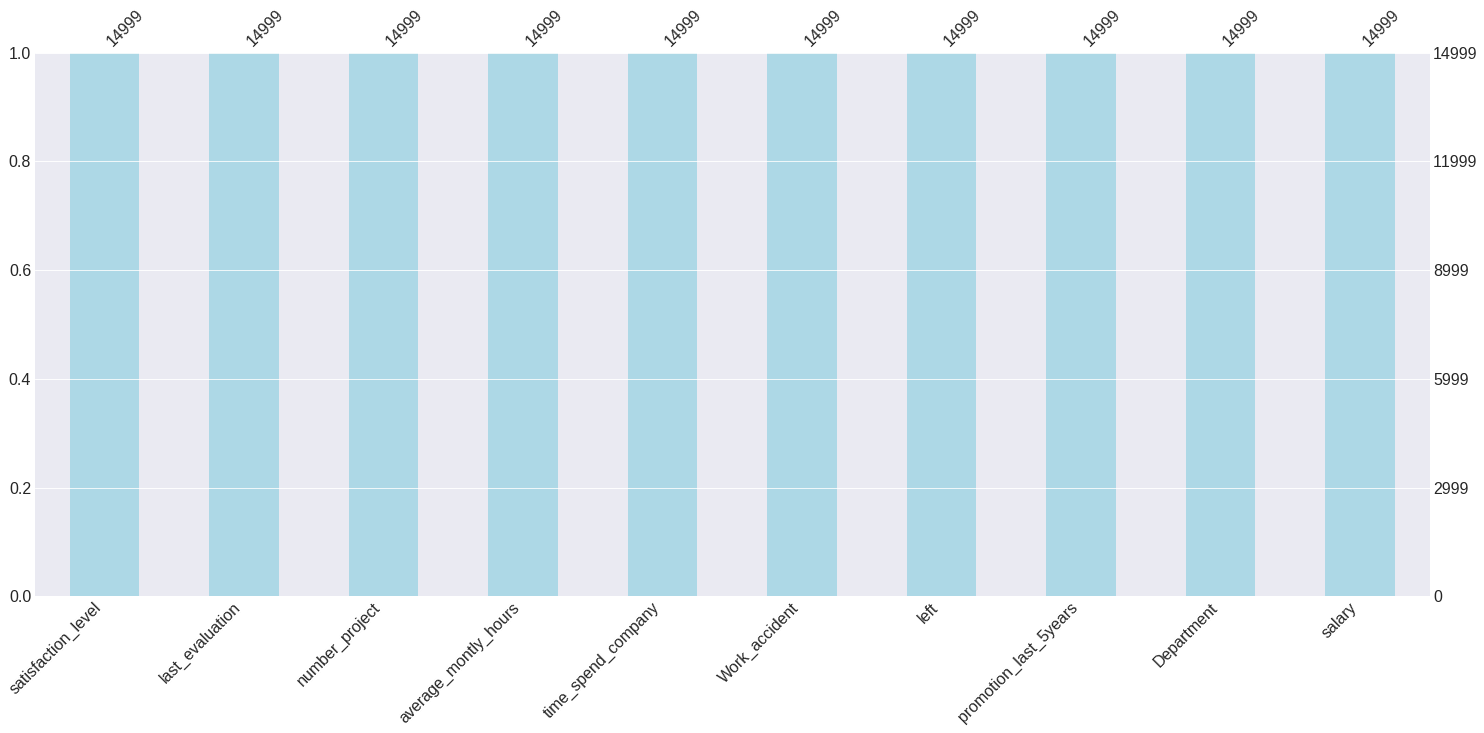

In [108]:
import missingno as no
no.bar(df, color='lightblue')

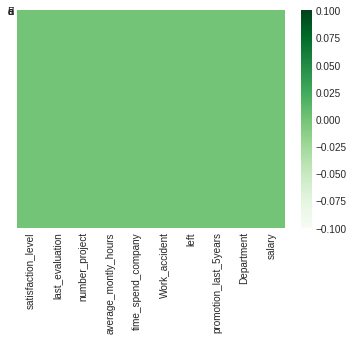

In [109]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='Greens')

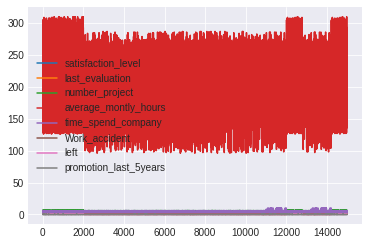

In [110]:
df.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


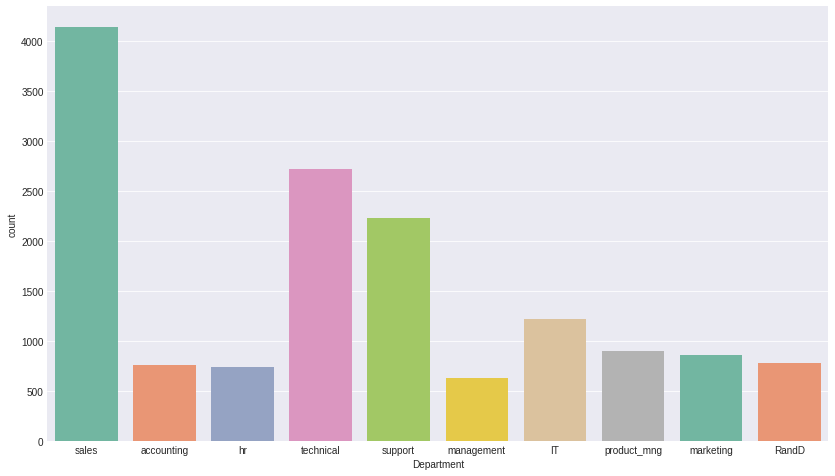

In [111]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn-darkgrid')
sns.countplot(df.Department, palette='Set2')
plt.show()

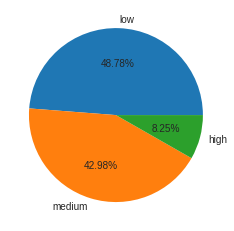

In [112]:
df2 = df['salary'].value_counts()
plt.pie(df2.values, labels=df2.index, autopct='%0.2f%%')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


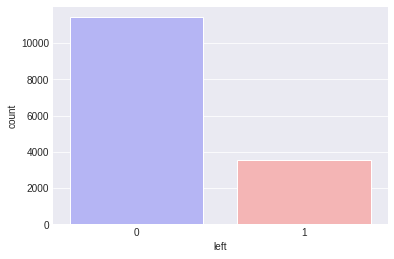

In [128]:
sns.countplot(df.left, palette='bwr')
plt.show()

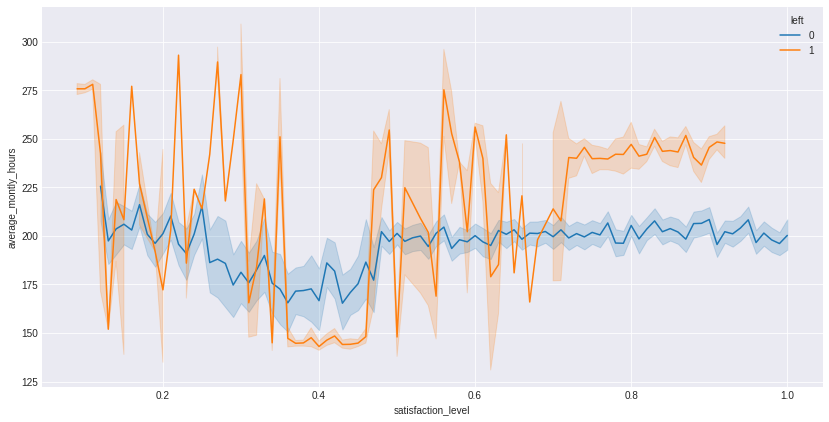

In [129]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
sns.lineplot(x="satisfaction_level" , y="average_montly_hours" , hue="left" , data=df)
plt.show()

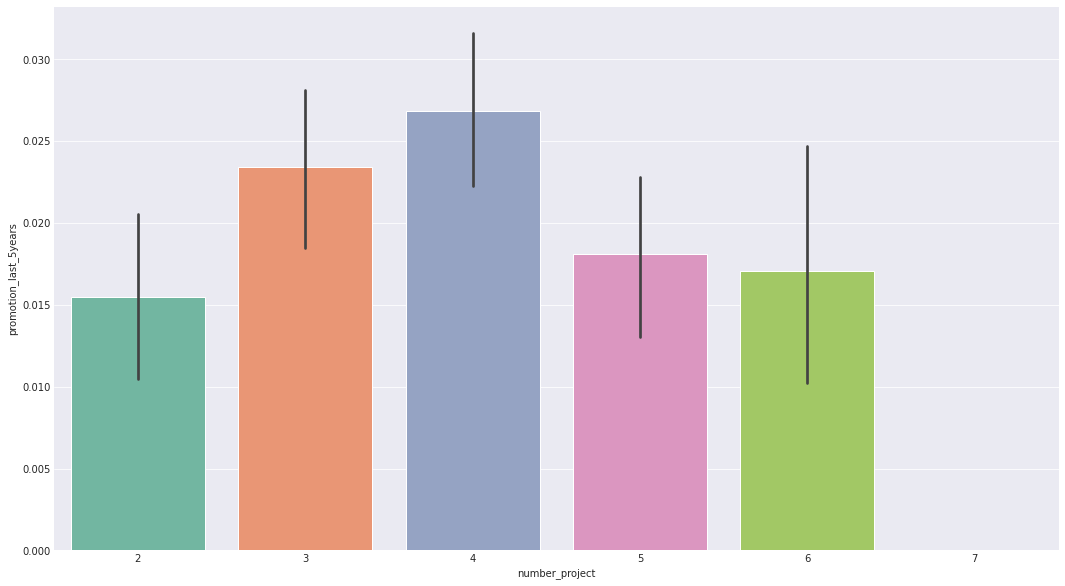

In [113]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,10))
sns.barplot(x='number_project',y='promotion_last_5years', data=df, palette='Set2')

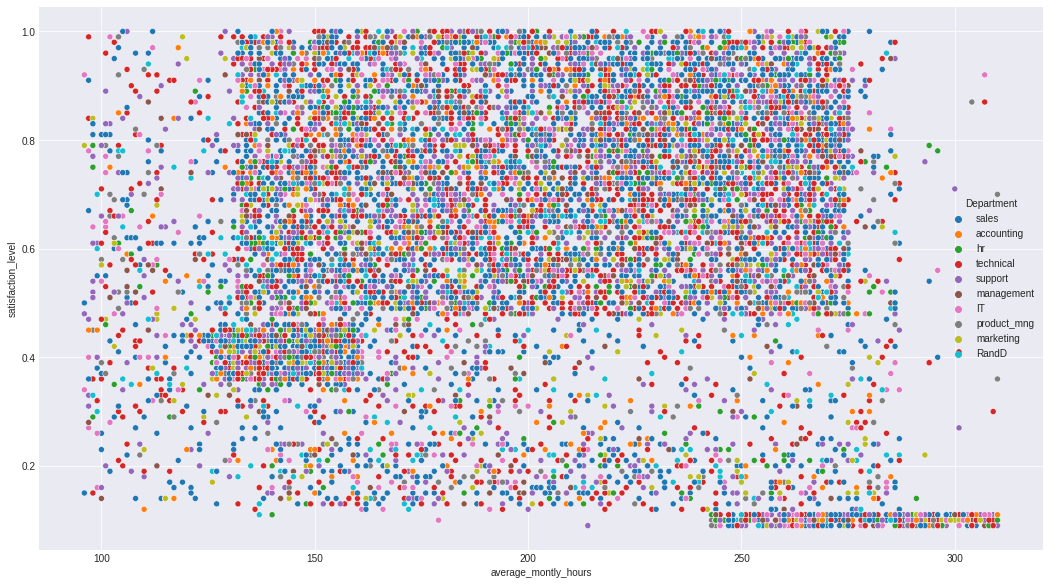

In [120]:
plt.figure(figsize=(18,10))
sns.scatterplot(x=df.average_montly_hours , y=df['satisfaction_level'], hue=df.Department )
plt.show()

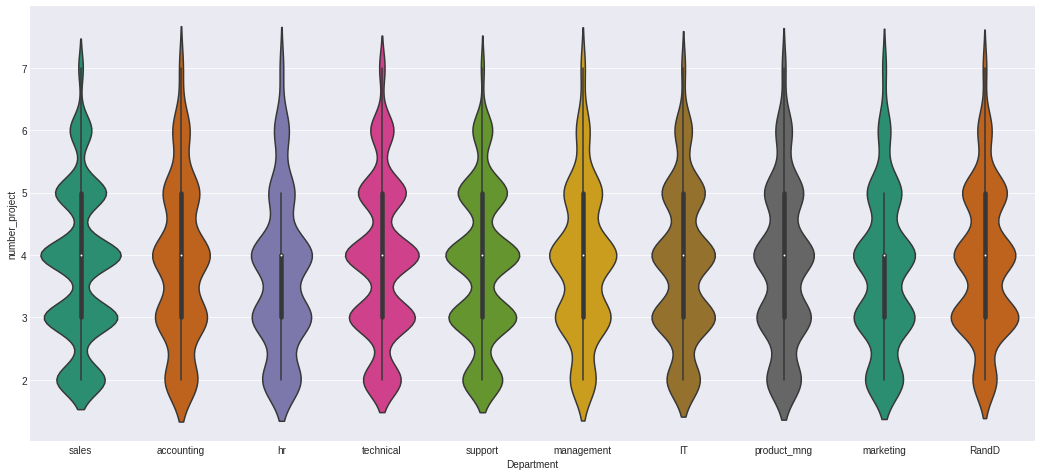

In [121]:
plt.figure(figsize=(18,8))
sns.violinplot(x=df.Department, y=df.number_project, palette='Dark2')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.2% of the points cannot be placed; y

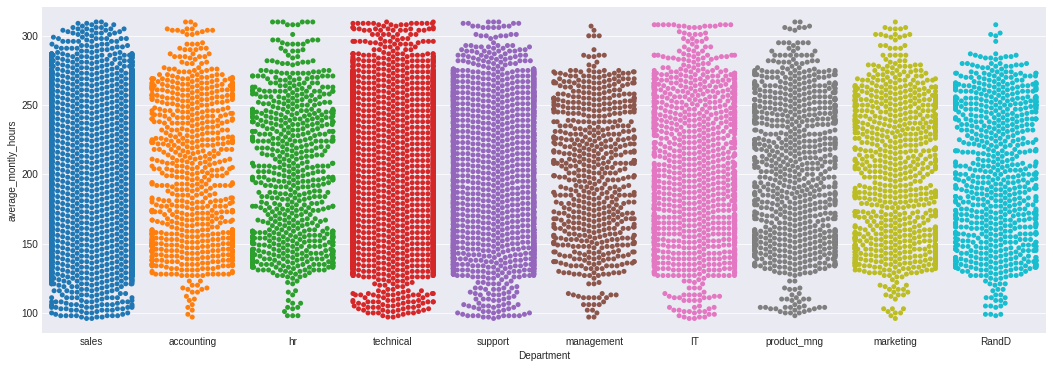

In [122]:
plt.figure(figsize=(18,6))
sns.swarmplot(x="Department" , y = "average_montly_hours" ,data=df)
plt.show()

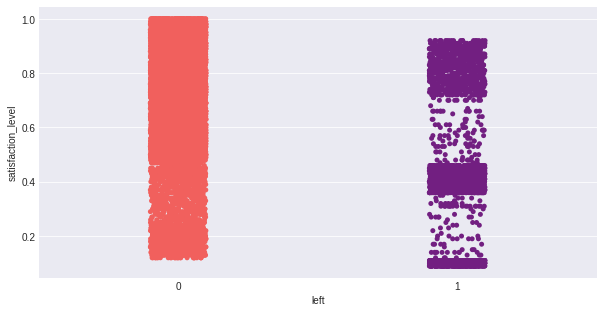

In [130]:
plt.figure(figsize=(10,5))
sns.stripplot(x=df.left, y=df.satisfaction_level, palette='magma_r')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


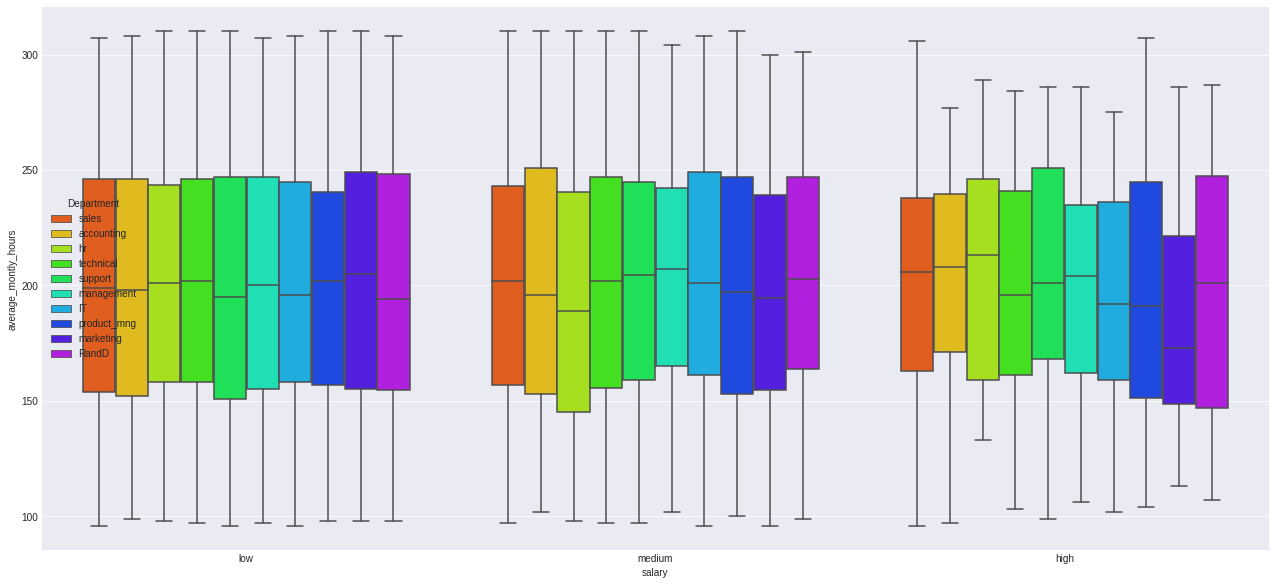

In [144]:
plt.figure(figsize=(22,10))
sns.boxplot("salary","average_montly_hours",data=df,hue="Department", palette='gist_rainbow')
plt.show()

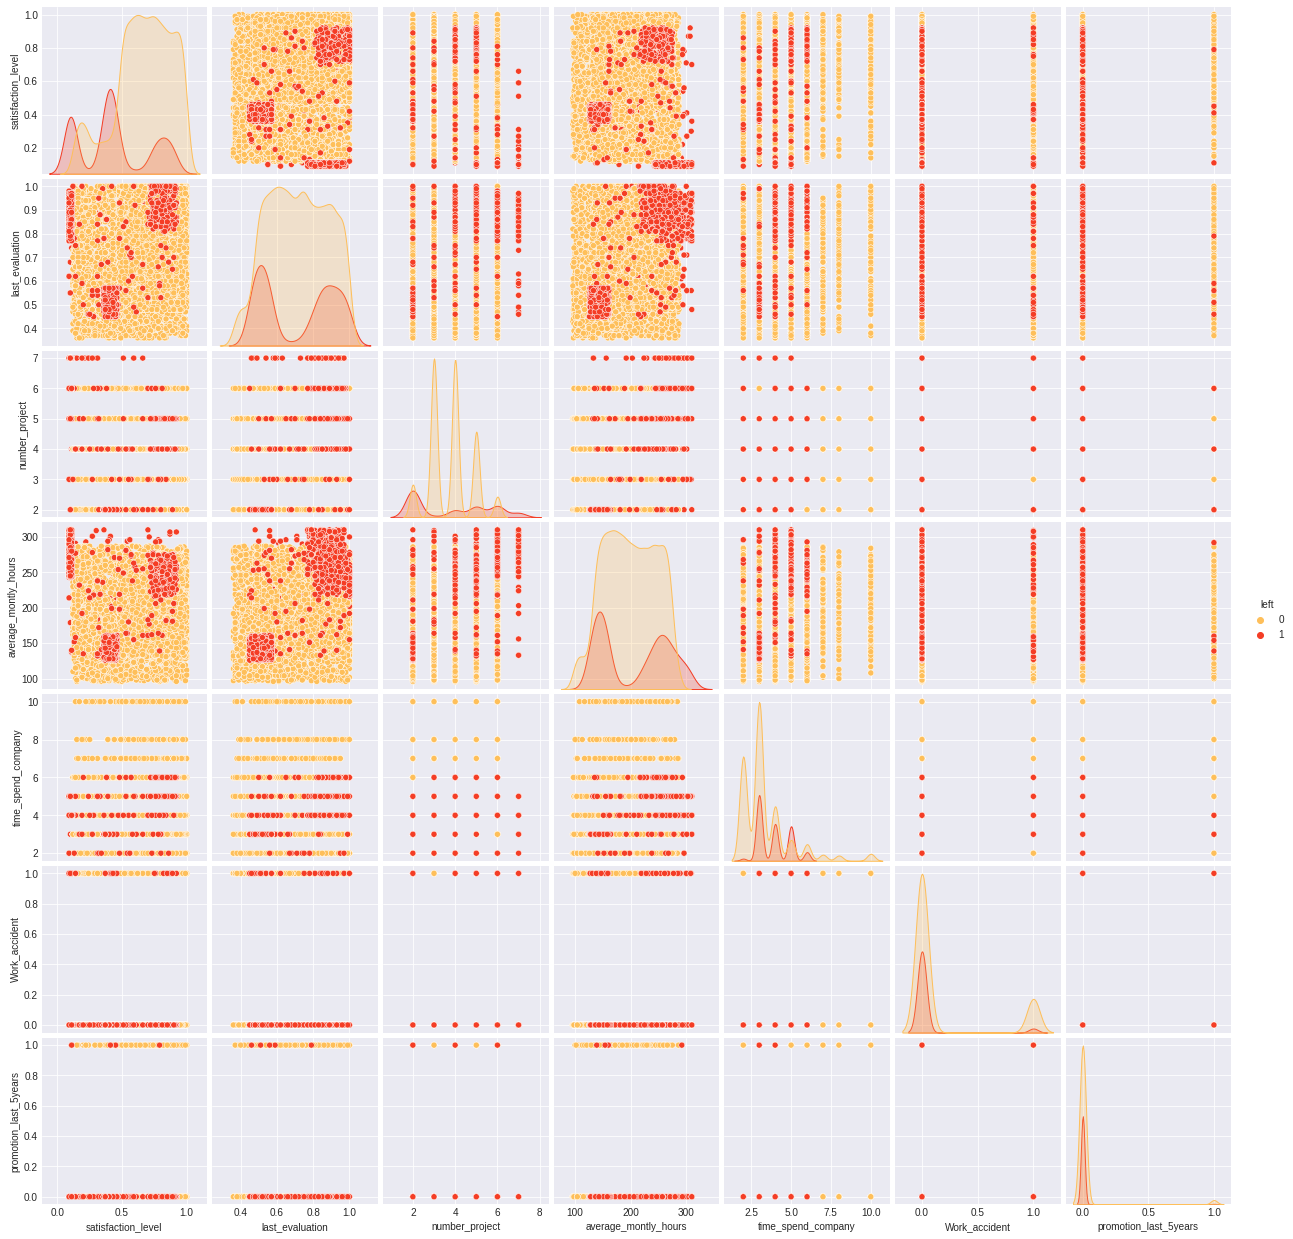

In [145]:
sns.pairplot(df, hue = 'left', palette='YlOrRd')
plt.show()

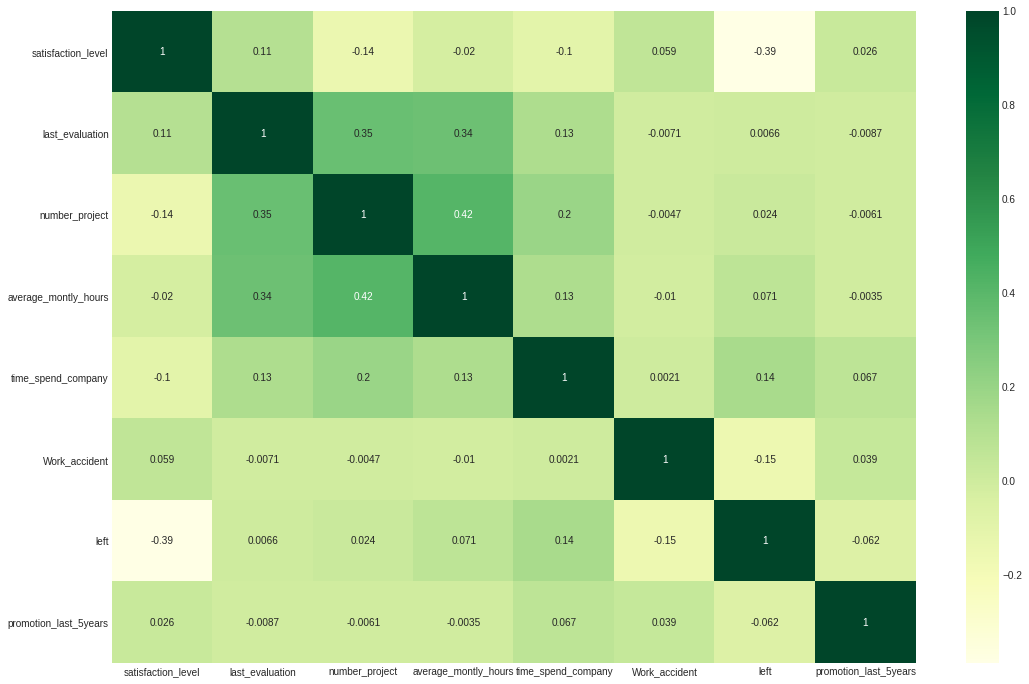

In [146]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), yticklabels='auto', annot=True, cmap='YlGn')
plt.show()

# Label Encoding

In [147]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])
df['salary'] = le.fit_transform(df['salary'])
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

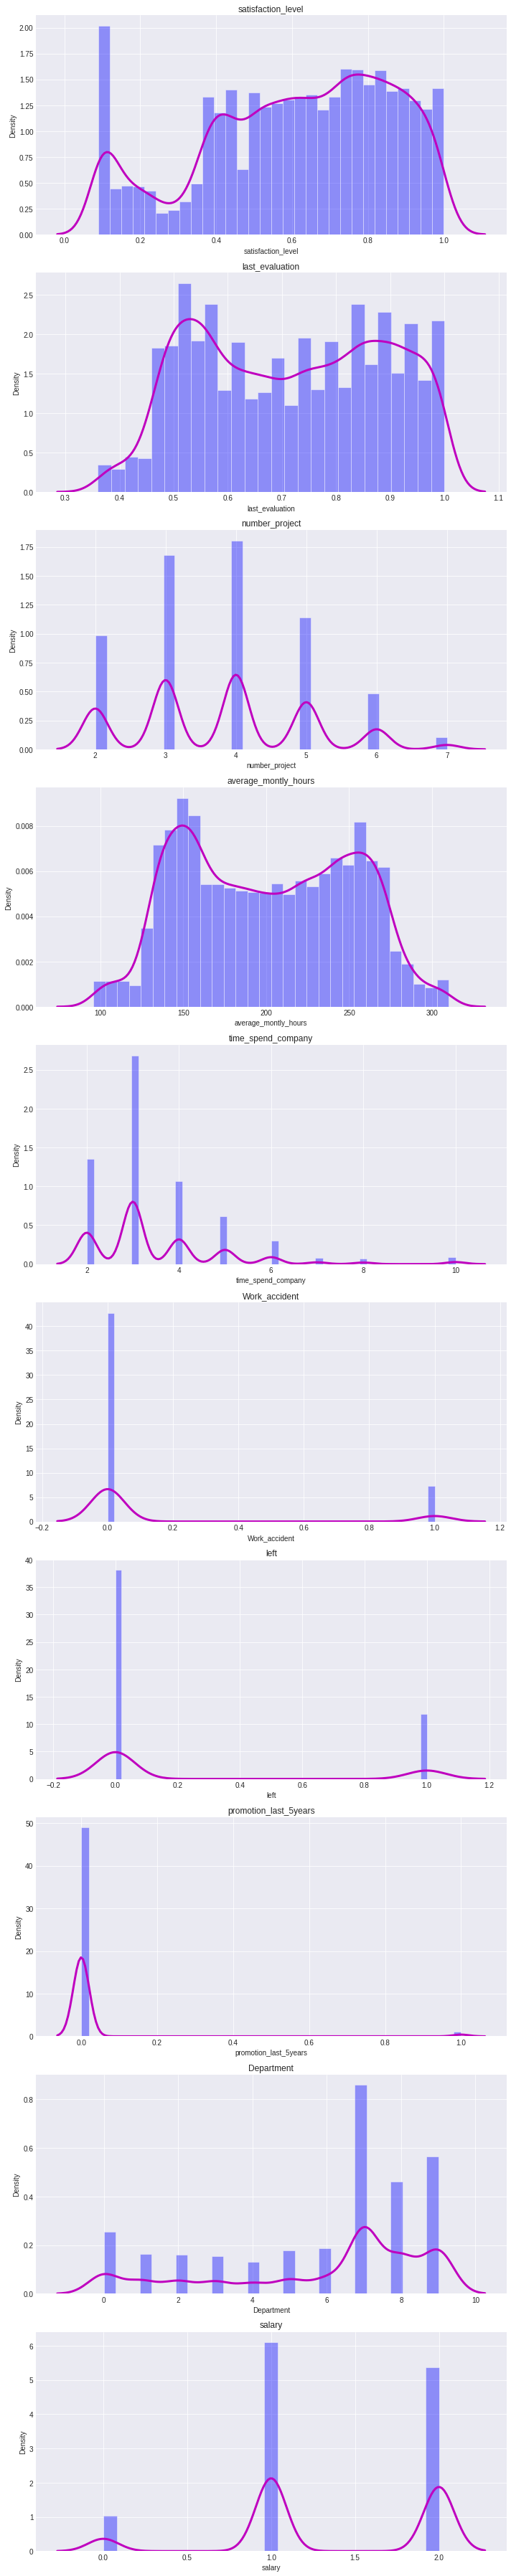

In [148]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(10, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "m", "lw": 3, "label": "KDE"}, hist_kws={"color": "b"})
  plt.title(df.columns[i])
  
plt.tight_layout()

# Splitting the Data into Dependent and Independent Variables

In [15]:
x = df.drop(['left'], axis=1)
y = df['left']

# Feature Importance

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.23733086 0.13873657 0.25481746 0.14024238 0.17421587 0.01569182
 0.00241198 0.02060604 0.01594703]


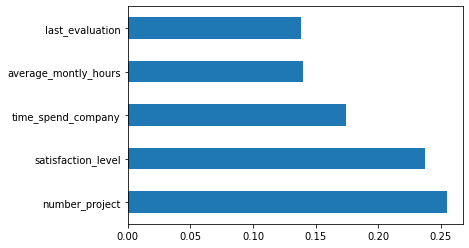

In [23]:
feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.nlargest(5).plot(kind='barh')

# Training and Testing the Data

In [62]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=20)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Logistic Regression

In [63]:
lm = LogisticRegression(n_jobs=3)
lm.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=3, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction

In [64]:
ypred_train = lm.predict(xtrain)
ypred_test = lm.predict(xtest)

## Confusion Matrix

In [65]:
cm = confusion_matrix(ytest, ypred_test)
cm

array([[2135,  162],
       [ 507,  196]])

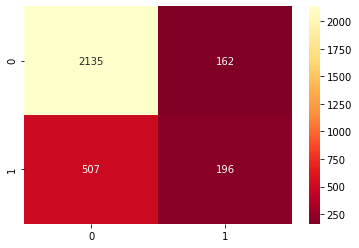

In [67]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd_r" ,fmt='g')

## Accuracy

In [66]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac1 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 76.59804983748646
Accuracy of testing data: 77.7


## Classification Report

In [68]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      2297
           1       0.55      0.28      0.37       703

    accuracy                           0.78      3000
   macro avg       0.68      0.60      0.62      3000
weighted avg       0.75      0.78      0.75      3000



# Decission Tree

In [70]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## Prediction

In [71]:
ypred_train = dt.predict(xtrain)
ypred_test = dt.predict(xtest)

## Confusion Matrix

In [72]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[2261,   23],
       [  36,  680]])

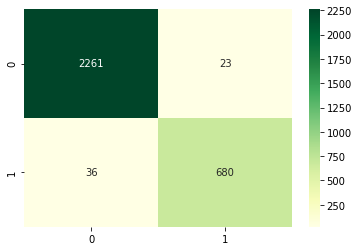

In [75]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn" ,fmt='g')

## Accuracy

In [73]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac2 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 100.0
Accuracy of testing data: 98.03333333333333


## Classification Report

In [74]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2297
           1       0.95      0.97      0.96       703

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000



# K Nearest Neighbour

In [76]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Prediction

In [77]:
ypred_train = knn.predict(xtrain)
ypred_test = knn.predict(xtest)

## Confusion Matrix

In [78]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[2170,   49],
       [ 127,  654]])

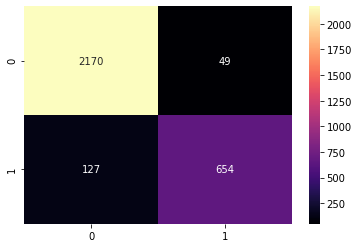

In [79]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="magma" ,fmt='g')

## Accuracy

In [80]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac3 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 96.8997416451371
Accuracy of testing data: 94.13333333333334


## Classification Report

In [81]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2297
           1       0.84      0.93      0.88       703

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.92      3000
weighted avg       0.94      0.94      0.94      3000



# Random Forest

In [82]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Prediction

In [83]:
ypred_train = rf.predict(xtrain)
ypred_test = rf.predict(xtest)

## Confusion Matrix

In [84]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[2294,   22],
       [   3,  681]])

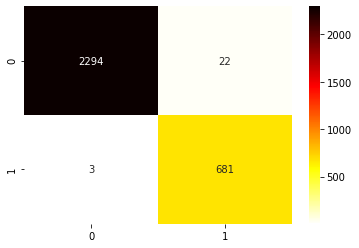

In [88]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="hot_r" ,fmt='g')

## Accuracy

In [89]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac4 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac4)

Accuracy of training data: 100.0
Accuracy of testing data: 99.16666666666667


## Classification Report

In [90]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2297
           1       1.00      0.97      0.98       703

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



# Comparing Accuracy

In [91]:
accuracy =  {ac1: 'Logistic Regression', ac2:'Decission Tree', ac3:'KNN', ac4: 'Random Forest'}

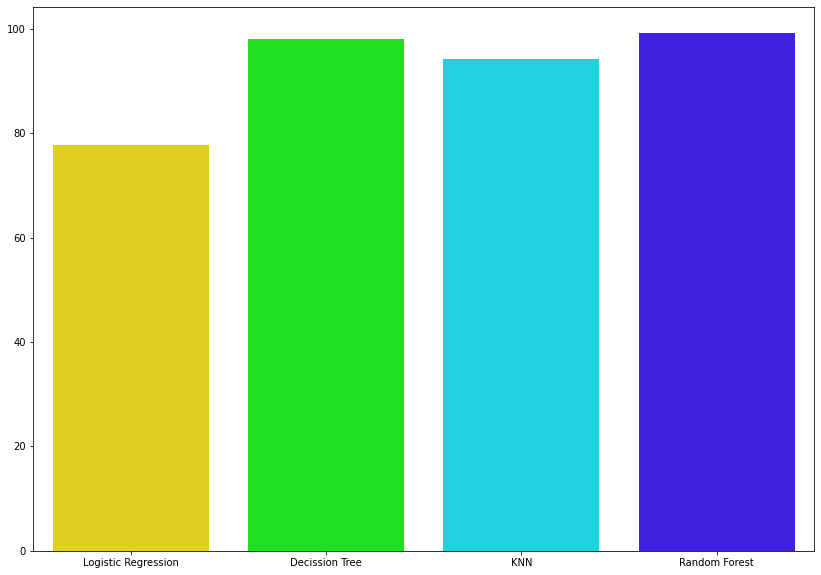

In [92]:
plt.figure(figsize=(14, 10))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');

As accuracy of Random Forest Classifier algorithm is more ie. 99.16%

Hence we will save the model.

# Saving the Model

In [93]:
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))

# Sample Prediction

In [150]:
p =rf.predict([[0.38,	0.53,	2,	157,	3,	0,	0,	7,	1]])
print("Left Status: ", p)

Left Status:  [1]
